# Option Valuation using Numerical Methods:
## A Python Programming Approach

There are many different kinds of assets traded in modern financial markets, nearly all falling within one of the five main categories of stock, bond, commodity, currency, or derivative.  Most folks have a basic understanding of stocks (equity in a business) and bonds (financial contracts issued by the government), and those who are more economically savvy may also be familiar with the trade of commodities (goods such as gold, oil, or grain) and currencies (investments in money, both foreign and domestic).  However, few individuals outside of the financial and academic worlds know much about derivatives.  A derivative is a financial instrument whose value is <em>derived</em> from some other asset such as a stock or commodity. To quote the English mathematician, Ian Stewart, 
<br><br>
<em style="text-align: center;">“Since the turn of the century the greatest source of growth in the financial sector has been in financial instruments known as derivatives.  Derivatives are not money, nor are they investments in stocks or shares.  They are investments in investments, promises about promises… This is finance in cloud cuckoo land, yet it had become the standard practice of the world’s banking system.”</em>
<br><br>
Mr. Stewart certainly a rather sour view on derivatives, but his words also help describes their importance in today’s financial landscape.   In this module,  we will learn about some basic derivatives, how they can be characterized mathematically, and how their value can be estimated using different numerical schemes.

## Keeping Our Options Open

Perhaps the most common derivative is the option, in which the owner of the option has the right to <em>buy </em>the underlying asset at a specific price by a some specified date (this is called a <strong>call</strong>) or else the owner has the right to <em>sell</em> the underlying asset at a specific price and date (this is called a <strong>put</strong>).  The price specified in the option contract is called the strike price and the date is simply referred to as the expiration date.  For the time being, we will consider only European options, a style of option whereby the owner may only exercise the option (that is, buy or sell the underlying asset) at the expiration date and no sooner.  Letting $K$ be the strike price and $S$ be the value of the underlying asset, the payoff $V$ of an option at expiration time can be characterized as

$$V_{call} =  \textrm{max}(S - K, 0)$$
$$V_{put} =  \textrm{max}(0, K - S)$$.

The payoffs are described this way because if the owner does not stand to make money by exercising the option, they will opt to simply let it expire and may choose to buy or sell the asset at the market price, $S$, thereby having a payoff of $0. <br><br>


Now let us put oursleves in the shoes of a trader who is considering wether or not to buy (and thus become the owner of) a certain option.  We know the terms of the contract, that is the strike price and time of expiration.  We also know some facts about the current state of the market including the present value of the asset, the risk-free interest rate (i.e. how much interest money would acrue sitting in a bank), and the level of volatility in the market.  Knowing all of this, what can we calculate to be the fair price of the option? <br>

As it turns out, this is no simple task. Luckily for us, in 1973 two economists named Fischer Black and Myron Scholes (with the help of a third economist, Robert Merton) derived an equation describing the price of an option over time.  The equation is

$$\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2S^2\frac{\partial^2V}{\partial S^2} + rS\frac{\partial V}{\partial S} - rV = 0$$

where $t$ is time, $\sigma$ is volatility, and $r$ is the risk-free interest rate.  This is pretty exciting stuff and the group was awarded the Nobel Prize in Economics in 1997 for their work.  For our purposes, we must note that the Black-Scholes equation has an analytic solution for European puts and calls, called the Black-Scholes formula and it is as follows:


$$V(S,t) = \epsilon S\Phi(\epsilon d1) - \epsilon Ke^{-r(T-t)}\Phi(\epsilon d2)$$
where $$ d1 = \frac{\ln(S/K)+(T-t)(r-\sigma^2/2)}{\sigma\sqrt{T-t}}$$<br>
$$ d2 = \frac{\ln(S/K)+(T-t)(r+\sigma^2/2)}{\sigma\sqrt{T-t}}$$<br>
$$\Phi(\zeta) = \frac{1}{2\pi}\int_{-\infty}^\zeta e^{-\eta^2/2}d\eta $$<br>
$$\epsilon = \bigg\{{1 \textrm{     for a call} \atop -1 \textrm{     for a put}} $$

Here, $T$ is the time of expiration and $V(S,t)$ is the value of the option at any time $t$. Armed with this formula, let us return to the issue at hand: valuing an option.  Let us suppose that we know the option has a strike price $K = \$40$, expiration $T = 0.5 \textrm{ years}$, and we know the market has a risk-free interest rate $r = 0.1$ and a volatility $\sigma = 0.25$.  Using Python and the Black-Scholes formula, the fair price for the option can be calculated for a range of possible current asset prices.

In [100]:
#Import necessary libraries and functions
import numpy as np
from scipy.stats import norm #Phi() is the normal CDF

#Allow plots in notebook and format plots
%matplotlib inline
import matplotlib.pyplot as pyplot
from matplotlib import rcParams
rcParams['figure.dpi'] = 100
rcParams['font.size'] = 16
rcParams['font.family'] = 'StixGeneral'

In [126]:
def bs_formula(type, S, K, T, r, sigma):
    if type == "C":
        eps = 1
    elif type == "P":
        eps = -1
    #V = np.zeros_like(S)
    d1 = (np.log(S/K) + T*(r + 0.5*sigma**2))/sigma*np.sqrt(T)
    #d2 = (np.log(S/K) + T*(r - 0.5*sigma**2))/sigma*np.sqrt(T)
    d2 = d1 - sigma*np.sqrt(T)
    V = eps*S*norm.cdf(eps*d1) - eps*K*np.exp(-r*T)*norm.cdf(eps*d2)
    V = np.clip(V, 0, np.inf)
    return V

In [377]:
#Parameters
K = 40 #strike price
T = 0.5 #expiration time
r = 0.1 #interest rate
sigma = 0.25 #volatility

S = np.linspace(1, 100,100) #array of possible current asset prices

Since we have defined a function that can value a European option, let's go ahead and use it assuming an initial asset price of \$45.

In [381]:
V_call = bs_formula("C", S, K, T, r, sigma)
print("Exact value of European call given initial asset price of $45 is $%.3f" %V_call[44])
V_put = bs_formula("P", S, K, T, r, sigma)
print("Exact value of European call given initial asset price of $45 is $%.3f" %V_put[44])

Exact value of European call given initial asset price of $45 is $7.295
Exact value of European call given initial asset price of $45 is $0.345


<strong>Note:</strong> At the time of this lesson's creation, the values being returned for a European call and put were \$7.295, and \$0.345, respectively. It is known from <a href="http://www.scienpress.com/Upload/CMF/Vol%201_1_3.pdf">another paper</a> on this subject, as well as various <a href = "http://www.money-zine.com/calculators/investment-calculators/black-scholes-calculator/">online option value calculators</a> that the true analytic results are \$7.620 and \$0.669, respectively.  Either an error exists in the code or the machine being used by the author is mangling the computation.  In any case, it is the two latter values (the true values) that will be taken to be the analytic solutions for the remainder of this lesson.

Great!  We have our result.  In fact, we calculated a whole array of results, each one based upon a different initial asset price.  If we graph all of these results, we may gain a better understanding of how European options function and how calls and puts differ in their payoffs.

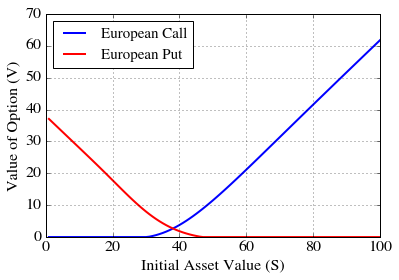

In [384]:
pyplot.plot(S,V_call,color='blue', lw=2, label="European Call")
pyplot.plot(S,V_put,color='red', lw=2, label="European Put")
pyplot.xlabel('Initial Asset Value (S)')
pyplot.ylabel('Value of Option (V)')
pyplot.grid()
pyplot.legend(loc='upper left',prop={'size':15});


## No solution? There's a solution for that!

The Black-Scholes formula is a godsend, but sometimes it doesn't work.  One such case is when volatility is not constant over the lifetime of an option. In such an instance, the Black-Scholes equation (recall the difference between the <em>equation</em> and the <em>formula</em>) still applies, but a neat, analytic solution just doesn't exist.  To value an option under these circumstances, we have to use a numerical scheme which will provide an estimate of the option's value.  Several numerical schemes exist that are capable of doing this, but here we choose to focus on the Crank-Nicolson method due to its accuracy and stability.

[INSERT DERIVATION] Taylor Series --> Discretization --> Crank-Nicolson averaging --> rearrange equation --> set up matrices

Now that we have derived the Crank-Nicolson scheme for valuing European options, let's define a Python function to implement it.

In [130]:
#import function to solve matrices
from scipy.linalg import solve

In [242]:
def cn_call(V, N, r, dt, sigma, S_max, K):
    M = np.shape(V)[0] - 1 #number of initial values
    i = np.arange(1,M) #array of indexes
    Vn = np.copy(V) 
    
    for t in range(N):  
        a = dt/4 * (r*i - sigma[t]**2*i**2)
        b = dt/2 * (r + sigma[t]**2*i**2)
        c = -dt/4 * (r*i + sigma[t]**2*i**2)
        
        #create LHS of Ax = b
        A = np.diag(1+b) + np.diag(c[:-1], 1) + np.diag(a[1:],-1)
        
        #create RHS of Ax = b
        B = np.diag(1-b) + np.diag(-c[:-1], 1) + np.diag(-a[1:],-1) #create matrix of RHS coefficients
        B = np.dot(B,Vn[1:-1]) #multiply coeff's by current option values
        B[-1] += -2*c[-1] * (S_max - K) #apply boundary condition
        
        #solve Ax = b
        Vn[1:-1] = solve(A,B)
    
    return Vn
    

In [358]:
#Parameters
N = 100 #number of time steps
T = 0.5 #expiration time
dt = T/N #timestep size
K = 40 #strike price
r = 0.1 #interest rate

S_max = 4*K #arbitrary maximum asset value of four times strike price
S = np.linspace(0, S_max, 161) #array of some possible current asset prices
V0 = np.clip(S - K, 0, S_max-K) #initial payoff value of option

#constant volatility of 0.25
sigma_const = np.zeros(N)[:] + 0.25 

Let us proceed by computing option values for the same initial asset price as before using the Crank-Nicolson function we have just defined.  Then, we can graphically compare the Crank-Nicolson results to the analytic results.

In [368]:
#apply CN for constant volatility
V_cn = cn_call(V0, N, r, dt, sigma_const, S_max, K)

print("CN estimated value of European call given initial asset price of $45 is $%.3f" %V_cn[45])

CN estimated value of European call given initial asset price of $45 is $7.616


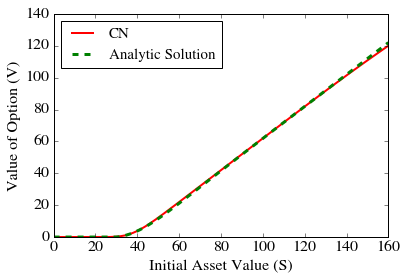

In [365]:
pyplot.plot(S,V_cn,color='red', lw = 2,label='CN')
pyplot.plot(S,V_call,color='green', ls='--', lw = 3, label='Analytic Solution')
pyplot.xlabel('Initial Asset Value (S)')
pyplot.ylabel('Value of Option (V)')
pyplot.legend(loc='upper left',prop={'size':15});

That looks pretty great! Clearly, some error exists, but we can get pretty near to the exact, analytic result using the Crank-Nicolson scheme. We will now move on to pricing an option under a non-contstant volatility.

In [387]:
#volatilty stepping from 0.0 to 0.8
sigma_step = np.zeros(N)
sigma_step[int(N/2):]+= 0.8

In [369]:
#apply CN for  non-contstant volatility
V_cn_step = cn_call(V0, N, r, dt, sigma_step, S_max, K)

print("CN estimated value of European call given initial asset price of $45 is $%.3f" %V_cn_step[45])

CN estimated value of European call given initial asset price of $45 is $10.616


(0, 35)

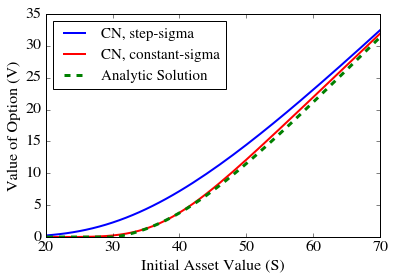

In [371]:
pyplot.plot(S,V_cn_step,color='blue', lw=2, label='CN, step-sigma')
pyplot.plot(S,V_cn,color='red', lw = 2,label='CN, constant-sigma')
pyplot.plot(S,V_call,color='green', ls='--', lw = 3, label='Analytic Solution')
pyplot.xlabel('Initial Asset Value (S)')
pyplot.ylabel('Value of Option (V)')
pyplot.legend(loc='upper left',prop={'size':15});
pyplot.xlim(20,70)
pyplot.ylim(0,35)

Well would you look at that.  Having a non-constant volatility can completely shift our valuation for an option!  Perhaps it's a bit silly to expect anyone to know precisely how market volatility will change over a given period of time (an old joke comes to mind about how weathermen and economists are the only people who can consistently be wrong and still keep their jobs), but the point is that as factors in the market change, the anaylitic solution starts to become irrelevant.  A strong numerical scheme such as the Crank-Nicolson method is an indespinsible tool for traders in an ever-shifting financial landscape.

## Life, Liberty, and the Freedom to Exercise Early

So far, we have focused only on European options where the owner may exercise the option only at the time of expiration. We now move on to American options, a style in which the option can be exercised at any time during its lifetime.  It should be noted that these names merely denote the option style and have nothing to do with where these options are actually traded.<br>

Due to the nature of American options, it is necessary to check at every timestep for the possibility of early exercise, making a Black-Scholes approach insufficient. Instead, a popular method for tackling the valuation of American options is the binomial model, proposed by Cox, Ross, and Rubinstein in 1979.  In the binomial model, we start with the knowledge that over the course of one time step, the stock price $S$ can move up to some value $Su$ with probability $p$ or down to some value $Sd$ with probability $1-p$. For a call option, then, we can define the value of the option after one up-tick to be <br>

$$V_u = \max(Su - K,0)$$ <br>and the value after a down-tick to be <br>

$$V_d = \max(Sd - K,0)$$.

Building from this, the current value of the option can be taken to be the expected value of its possible future values, discounted by the interest that would be acrued between now and said future values. This can be expressed as

$$ V = e^{-rdt}[pV_u + (1-p)V_d] $$

and we shall note here that 

$$ u = e^{\sigma\sqrt{dt}} $$ <br>
$$ d = 1/u = e^{-\sigma\sqrt{dt}} $$ <br>
$$p = \frac{e^{rdt}-d}{u - d}$$

We won't be troubled over the derivation of $u$,$d$, and $p$ for the purposes of this lesson, but the <a href="https://www.researchgate.net/profile/Stephen_Ross3/publication/4978679_Option_pricing_A_simplified_approach/links/09e4151363b7910ad9000000.pdf">Cox, Ross, Rubenstein paper</a> is actually quite interesting and is worth the read.

So at every time step, the value of the asset (and, correspondingly, the option) has the possibility of moving up or down.  Over the course of many time steps, the possibilities spread out, forming what is known as a binomial tree (pictured below).

<img src="./figures/bintree.PNG">
<em style = "text-align: left; font-size: 0.8em">Image source: https://upload.wikimedia.org/wikipedia/commons/2/2e/Arbre_Binomial_Options_Reelles.png</em>

Each box in the tree is referred to as a leaf.  The easiest and most common way of finding an option's value using the binomial method is to use given information to find the asset values at all of the final leaves (that is, the leaves existing at the time of expiration), and then working backwards towards a fair value for the option at the beginning of its lifetime. The first step is use the time of expiration $T$, the number of time steps $N$, the risk-free interest rate $r$, and the market volatility $\sigma$ (we once again assume this to be constant over the lifetime of the option) to find $u$,$d$, and $p$.  Next, we can express the leaves at the expiration time as a list of the form

$$ S_0d^Nu^0,\ S_0d^{N-1}u^1,\ S_0d^{N-2}u^2,...,S_0d^0u^{N-2},\ S_0d^1u^{N-1},\ S_0d^0u^{N} $$

where $S_0$ is the initial asset value.  Using the formulae mentioned earlier in this section, we can then use these final asset values to make a list of final option values. These final option values can then be used to determined the option values at the preceeding time step, and then these option values can be used to solve for the previous option values, and so on and so forth until we have arrived at the initial value of the option. If the option is American, at each iteration we must also compare the value of holding the option longer versus the value of exercising it early.  If the early exercise value is greater, then we assume that the owner of the option would do so and we replace the recursively calculated value at that leaf with the early exercise value. To perform this scheme using Python, we can write a function such as the one below:

In [263]:
def binomial(type, S0, k, r, sigma, T, N ,american="false"):
    dt = T/N #time step
    u = np.exp(sigma * np.sqrt(dt))
    d = 1/u
    K = np.ones(N+1)*k #strike price array
    p = (np.exp(r * dt) - d)/ (u - d)
    V =  np.zeros(N+1) #initialize option value array
    
    #expiration asset prices (S)
    S = np.asarray([(S0 * u**j * d**(N - j)) for j in range(N + 1)])  
    
    #expiration option values (V)
    if type =="C":
        V = np.clip(S - K, 0, np.inf)
    elif type =="P":
        V = np.clip(K - S, 0, np.inf)
   
    #calculate backwards the option prices
    for i in range(N-1, -1, -1):
        #Current Option Value: V = e^(-r*dt)(pVu + (1-p)Vd)
        V[:-1]=np.exp(-r * dt) * (p * V[1:] + (1-p) * V[:-1])
        #Current Assett Values
        S[:-1] = S[:-1]*u

        if american=='true':
        #Check if current exerise value is greater than exercise at expiration. If so, exercise early.
            if type =="C":
                V = np.maximum(V, S - K)
            elif type =="P":
                V = np.maximum(V, K - S)
    
    #Return value of option at t=0
    return V[0]

<em style="font-size: 0.8em">Please note that while the above code is the original work of the author, it owes much of its overall structure to a code found <a href = "http://gosmej1977.blogspot.be/2013/02/american-options.html">here</a>. I would be remiss not to say thank you to one Julien Gosme for providing the framework for this code on his/her blog.</em>

Let's now define our parameters once again and use the binomial function to estimate the value of different options.

In [267]:
#Parameters
N = 100 #number of time steps
T = 0.5 #expiration time
K = 40 #strike price
r = 0.1 #interest rate
sigma = 0.25 #volatility
S0 = 45 #initial asset price

In [280]:
V_bin_EC = binomial("C", S0, K, r, sigma, T, N ,american="false")
print("The value of a European Call is %.3f" %V_bin_EC)
V_bin_EC = binomial("P", S0, K, r, sigma, T, N ,american="false")
print("The value of a European Put is %.3f" %V_bin_EC)
V_bin_EC = binomial("C", S0, K, r, sigma, T, N ,american="true")
print("The value of an American Call is %.3f" %V_bin_EC)
V_bin_EC = binomial("P", S0, K, r, sigma, T, N ,american="true")
print("The value of an American Put is %.3f" %V_bin_EC)

The value of a European Call is 7.623
The value of a European Put is 0.672
The value of an American Call is 7.623
The value of an American Put is 0.723


If we compare our analytic values for a European call/put to those estimated above, we see that the binomial model does a pretty good job of estimating an option's value. Also, notice how the values for the European and American calls are identical, while the value of the American put is greater than its European counterpart. This is because under the assumptions of our model (i.e. no <a href="http://www.investopedia.com/terms/d/dividend.asp">dividends</a> and no <a href="http://www.investopedia.com/terms/a/arbitrage.asp">arbitrage</a>), it is never optimal for the owner of an American call to exercise early.  However, there do exist some circumstances where the owner of an American put would exercise early, thus raising its value compared to a plain old European put. For a mathematical proof of why this is the case, check out this <a href="http://www.math.nyu.edu/~cai/Courses/Derivatives/lecture8.pdf">lecture outline</a> from NYU.

## Tokyo Royale

Okay, so that title is a pretty lame joke, but it fits because what we are going to be looking at in this section is valuing an Asian option using the Monte Carlo method. Again, the name of the option has nothing to do with where it is traded, rather a couple of English financial analysts happened to be in Tokyo when they devised it.  The Asian option is different from other options because its payoff is derived from the average asset price over the option's lifetime, making it path-dependent. These options have an advantage of being less susceptible to volatility than European or American options, but they also pose a challenge for estimating their value, as there are a huge number of possible paths an asset's price can take over even a relatively small period of time.

This challenge can be met using the Monte Carlo method, which owes its name to the fact that its underlying principle is akin to rolling a dice over and over, as in a casino.  To use this method, we start by simulating a single path that the price of the asset may take between the time the option is created to the time of expiration. The asset price is assumed to follow 

$$ dS = \mu Sdt + \sigma SdW(t) $$

where $dW(t)$ is a Wiener (i.e. Brownian) process and $\mu$ is the expected return on the asset in a risk-neutral world.  If we let $dS$ be the change in asset price over some very small time step $dt$ and substitute $r$ for $\mu$ (because they are synonymous in this context), we can rearrange this equation to be

$$ S(t + dt) - S(t) = rS(t)dt + \sigma S(t)Z\sqrt{dt} $$

where $Z\sim N(0,1)$.  It is more accurate to simulate $\ln S(t)$ than $S(t)$, so we use <a href="https://en.wikipedia.org/wiki/It%C3%B4%27s_lemma">Ito's lemma</a> to transform our equation, yielding

$$\ln S(t + dt) - \ln S(t) = (r - \frac{\sigma^2}{2})dt + \sigma Z\sqrt{dt}$$

which is equivalent to

$$S(t + dt) = S(t)e^{(r - \frac{\sigma^2}{2})dt + \sigma Z\sqrt{dt}}$$

A Python function has been defined below that simulates the path of an asset based on this equation.

In [285]:
from random import gauss

def asset_path(St, sigma, r, dt):
    St = St * np.exp((r - 0.5 * sigma**2)*dt + sigma * gauss(0,1.0) * np.sqrt(dt))
    return St

The next step of the Monte Carlo method is to simulate many of these paths.  The law of large numbers tells us that the more paths we simulate, the closer the average of these paths will be to the true mean path. Let us try this for a European call using the same parameters as before.

In [325]:
#parameters
S0 = 45 #initial asset price
K = 40 #strike price
sigma = 0.25 #volatility
r = 0.1 #risk-free interest rate
T = 0.5 #time of expiration
N = 100 #number of time steps

In [330]:
def monte_carlo(sims, N, T, S0, sigma, r):
    
    dt = T/N
    all_paths = np.zeros(N)

    for trial in range (0,sims):
        prices = [S0]    
        St = S0
        for t in range(1,N):
            St = asset_path(St, sigma, r, dt)
            prices.append(St)

        if trial < 1:
            all_paths += prices
        else:
            all_paths = np.vstack((all_paths, prices))

        t = range(0,N)
        pyplot.plot(t,prices)
        pyplot.xlabel('Time Step (N)')
        pyplot.ylabel('Asset Price ( S(t) )')
    
    return all_paths
    pyplot.show()
    

Time to test our simulation function! We'll stick to 10 simulations just to make sure it works.

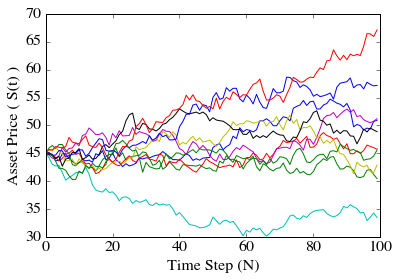

In [331]:
sims = 10
test = monte_carlo(sims, N, T, S0, sigma, r)

Hey, not too shabby!  This looks pretty believable, so let's move on to something more rigorous. How about 1,000 simulations?

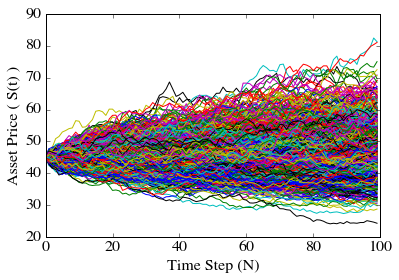

In [332]:
sims = 1000
MC_sim = monte_carlo(sims, N, T, S0, sigma, r)

Wow, look at all those lines and colors! Sometimes math really can be art. For our final step, we estimate the value of a European call by taking the average of the final asset prices for each simulated path and subtracting the strike price.

In [333]:
print("Monte-Carlo estimated value of European call is %.3f" %(np.max((np.average(MC_sim[:,-1]) - K),0)))

Monte-Carlo estimated value of European call is 7.476


That result is not quite perfect, but we're certainly in the ballpark. Perhaps with more simulations or a larger CPU, the answer would be even closer to the analytic result. Let's move on to valuing an Asian option.  Since we already performed the Monte-Carlo simulations, the only thing we need to change is how we process the results.  The first step will be to interatively go through the matrix of resulting asset prices, averaging each column, which will yield an array characterizing the expected - or mean - path.  We will then apply the payoff equation for an Asian call which is

$$V_{call} = \textrm{max}(\ \textrm{avg}(\ S(t)\ )-K,0) $$

In [334]:
mean_path = np.zeros(N)
for i in range(N):
    mean_path[i] = np.average(MC_sim[:,i])

print("Monte-Carlo estimated value of Asian call is %.3f" %(np.average(mean_path) - K))

Monte-Carlo estimated value of Asian call is 6.261


There you have it! We have successfully estimated the value of an Asian call, something that could not have been achieved analytically, nor with the Crank-Nicolson or Binomial methods.  There isn't any great way to check the accuracy of this estimate, besides maybe adding more and more simulations, but we do expect an Asian call to be valued below a European call due to the averaged nature of its payoff.  Our result here at least meets that rather basic criterion.

In [391]:
from IPython.core.display import HTML
css_file = './styles/connor_style.css'
HTML(open(css_file, "r").read())